In [1]:
# Amazon Web Scraping

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
no_of_pages=5

In [4]:
url='https://www.amazon.in/'

In [5]:
def my_url(page,keyword):
    url='https://www.amazon.in/s?k={}&ref=nb_sb_noss_1'.format(keyword)
    url+='&page={}'.format(page)
    return url

In [6]:
def extract_info(obj):
    atag=obj.h2.a
    des=obj.h2.a.text.strip()
    url='https://www.amazon.in/'+atag.get("href")
    
    try:
        parent=obj.find('span','a-price')
        price=parent.find('span','a-offscreen').text
    except AttributeError:
        return 
    try:
        rate=obj.find('span',"a-icon-alt").text
        review_count=obj.find('span',"a-size-base s-underline-text").text
    except:
        rate=' '
        review_count=' '
    img=obj.find('img','s-image').get('src')
    result=[des,price,rate,review_count,url,img]
    return result
        

In [7]:
def main(no_of_pages,keyword):
    if len(keyword.split())>1:
        keyword='+'.join(keyword.split())
    driver=webdriver.Chrome()
    records=[]
    for i in range(1,no_of_pages+1):
        url=my_url(i,keyword)
        driver.get(url)
        soup=BeautifulSoup(driver.page_source,'html.parser')
        data=soup.find_all('div',{"data-component-type":"s-search-result"})
        for i in data:
            record=extract_info(i)
            if record:
                records.append(record)
            
    return records
    

In [8]:
res=main(no_of_pages,'Laptop')
df=pd.DataFrame(res,columns=['Product_Description','Price','Ratings','Review_Counts','Url','Image'])
df.head()

,Product_Description,Price,Ratings,Review_Counts,Url,Image
0,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,"₹49,500",4.0 out of 5 stars,206,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/51LATy7uCG...
1,Acer Predator Helios Neo 16 Gaming Laptop 13th...,"₹1,29,990",4.1 out of 5 stars,17,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/81E2srXhKV...
2,Acer One 14 Business Laptop Intel Core i5 1135...,"₹44,990",5.0 out of 5 stars,2,https://www.amazon.in//Acer-Business-Windows-S...,https://m.media-amazon.com/images/I/71kL55KJC+...
3,"Dell Vostro 3425 Laptop, AMD Ryzen 5-5500U/8GB...","₹41,990",3.7 out of 5 stars,7,https://www.amazon.in//Dell-5-5500U-Rheinland-...,https://m.media-amazon.com/images/I/51u9Q4IEns...
4,"Lenovo V15 Intel Celeron N4500 15.6"" (39.62 cm...","₹21,990",2.8 out of 5 stars,5,https://www.amazon.in//Lenovo-Celeron-1920x108...,https://m.media-amazon.com/images/I/51gns9dlT+...


In [9]:
def formating(data):
    data.index+=1
    data['Price']=data['Price'].str[1:].str.replace(',','')
    data['Ratings']=data['Ratings'].str[:3]
    data['Review_Counts']=data['Review_Counts'].str.replace(',','')
    data['Price']=data['Price'].astype(float)
    data['Ratings']=data['Ratings'].astype(float)
    data['Review_Counts']=data['Review_Counts'].astype(int)
    return data

In [10]:
def preprocessing(data):
    if(data.isnull().sum().sum()==0 and df[df==' '].count().sum()==0):
        data=formating(data)
    else:
        data.fillna('0',inplace=True)
        data[data==' ']='0'
        data=formating(data)
    return data

In [11]:
res=preprocessing(df)

In [12]:
res.dtypes

Product_Description     object
Price                  float64
Ratings                float64
Review_Counts            int32
Url                     object
Image                   object
dtype: object

<h3>Successfully Preprocessed and Formatted the Data!</h3>

In [13]:
def Analysis(data):
    print('*****************************************************')
    print('Finding the Correlation between Price,Ratings,Review_Counts\n')
    relation=data[['Price','Ratings','Review_Counts']]
    print(relation.corr())
    print('******************************************************')
    print('Data Info:\n')
    print(data.info())
    print('******************************************************')
    print('Descriptive Summary:\n')
    print(data.describe())
    print('******************************************************')
    
    

In [14]:
Analysis(res)

*****************************************************
Finding the Correlation between Price,Ratings,Review_Counts

                  Price   Ratings  Review_Counts
Price          1.000000  0.114731       0.026144
Ratings        0.114731  1.000000       0.204705
Review_Counts  0.026144  0.204705       1.000000
******************************************************
Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 1 to 109
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Description  109 non-null    object 
 1   Price                109 non-null    float64
 2   Ratings              109 non-null    float64
 3   Review_Counts        109 non-null    int32  
 4   Url                  109 non-null    object 
 5   Image                109 non-null    object 
dtypes: float64(2), int32(1), object(3)
memory usage: 4.8+ KB
None
***************************************************

<h3>Analysis Successfully Completed!<h3>

Correaltion Price vs Ratings vs Review_Counts

AxesSubplot(0.125,0.125;0.62x0.755)


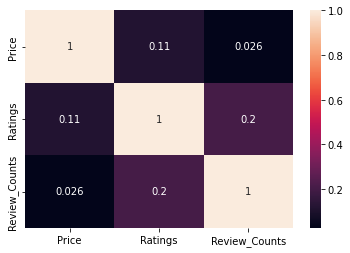

In [15]:
relation=res[['Price','Ratings','Review_Counts']]
print('Correaltion Price vs Ratings vs Review_Counts\n')
corelation=relation.corr()
print(sns.heatmap(corelation,annot=True,))

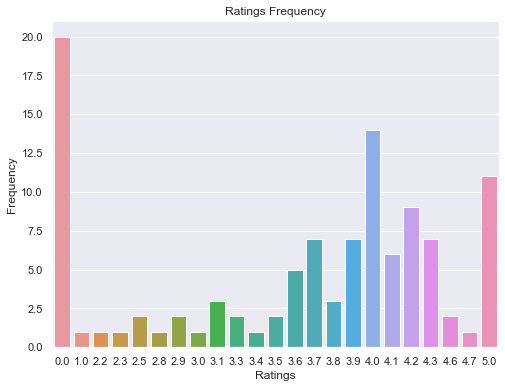

In [16]:
rate=res['Ratings'].tolist()
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x=rate)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Ratings Frequency')
plt.show()

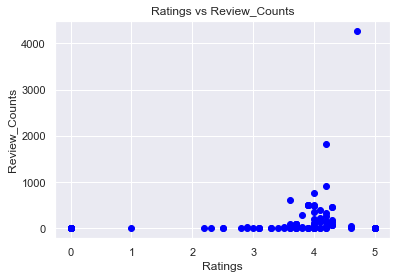

In [17]:
lin_rat_rev=plt.scatter(res['Ratings'].tolist(),res['Review_Counts'].tolist(),c='blue')
plt.xlabel('Ratings')
plt.ylabel('Review_Counts')
plt.title('Ratings vs Review_Counts')
print(lin_rat_rev)

<h5> There is no correlation between Price vs Ratings and Price vs Review_Counts </h5>

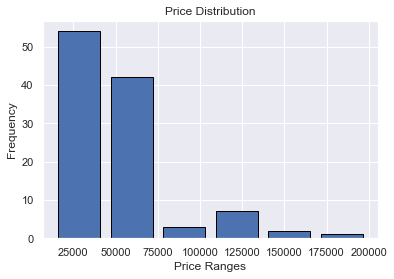

In [18]:
plt.hist(res['Price'].tolist(), bins=6, edgecolor='black',rwidth=0.8)

# Set labels and title
plt.xlabel('Price Ranges')
plt.ylabel('Frequency')
plt.title('Price Distribution')

# Show the plot
plt.show()

<h3>Visualizations Successfully Completed!<h3>

<h3>Questions?<h3>

<b> 1. Where I need the product which has good ratings !!! </b>

In [26]:
n=int(input('Enter top no of ratings you want:'))
res.sort_values('Ratings',ascending=False).head(n)

Enter top no of ratings you want:10


,Product_Description,Price,Ratings,Review_Counts,Url,Image
30,"HP 247 G8 Notebook PC, AMD Athlon™ Silver 3050...",20001.0,5.0,1,https://www.amazon.in//HP-247-G8-Notebook-Anti...,https://m.media-amazon.com/images/I/81yUqauTI5...
88,Apple 2023 MacBook Air laptop with M2 chip: 38...,134900.0,5.0,1,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/81xW62KXNh...
16,"HP ProBook 445 G8 Notebook PC, AMD Ryzen 7 580...",46990.0,5.0,2,https://www.amazon.in//HP-ProBook-445-G8-Noteb...,https://m.media-amazon.com/images/I/61WS4xoCvv...
23,Apple 2023 MacBook Air Laptop with M2 chip: 38...,154900.0,5.0,1,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/71S4sIPFvB...
11,Apple 2023 MacBook Air Laptop with M2 chip: 38...,134900.0,5.0,1,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/71S4sIPFvB...
83,"ASUS Vivobook 15 (2023), Intel Core i5-1335U 1...",59990.0,5.0,2,https://www.amazon.in//ASUS-Vivobook-i5-1335U-...,https://m.media-amazon.com/images/I/71BUBqd5nJ...
45,Apple 2023 MacBook Air laptop with M2 chip: 38...,154900.0,5.0,1,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/81xW62KXNh...
67,Apple 2023 MacBook Air laptop with M2 chip: 38...,134900.0,5.0,1,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/81UFHe-hH5...
50,"HP Pavilion Laptop, 13th Gen Intel Core i5-134...",73990.0,5.0,1,https://www.amazon.in//HP-Pavilion-i5-1340P-Gr...,https://m.media-amazon.com/images/I/81A9jE3wMH...
3,Acer One 14 Business Laptop Intel Core i5 1135...,44990.0,5.0,2,https://www.amazon.in//Acer-Business-Windows-S...,https://m.media-amazon.com/images/I/71kL55KJC+...


<b>2.Where I need the product info which has one with good ratings and Review_Counts  1 </b> 

In [23]:
top=res.sort_values(['Ratings','Review_Counts'],ascending=False).iloc[0,:].tolist()
print('Product Information...\n')
print(f'Product_Description : {top[0]}\nPrice : {top[1]}\nRatings : {top[2]}\nReview_Counts : {top[3]}')
print("Url :",top[4])
print("Image :",top[5])

Product Information...

Product_Description : Acer One 14 Business Laptop Intel Core i5 1135G7 (16GB RAM/512GB SSD/Windows 11 Home/MS Office Home and Student) Z8-415 with 35.56 cm (14.0") Full HD Display (Silver)
Price : 44990.0
Ratings : 5.0
Review_Counts : 2
Url : https://www.amazon.in//Acer-Business-Windows-Student-Z8-415/dp/B0C77J952V/ref=sr_1_3?keywords=Laptop&qid=1688046683&sr=8-3
Image : https://m.media-amazon.com/images/I/71kL55KJC+L._AC_UY218_.jpg


<b>3.Search For The Product :)</b>

In [25]:
key=input("Enter the Product keyword to search:")
filter_df=res[res['Product_Description'].str.contains(key.capitalize())]
filter_df

Enter the Product keyword to search:lenovo


,Product_Description,Price,Ratings,Review_Counts,Url,Image
1,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,49500.0,4.0,206,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/51LATy7uCG...
5,"Lenovo V15 Intel Celeron N4500 15.6"" (39.62 cm...",21990.0,2.8,5,https://www.amazon.in//Lenovo-Celeron-1920x108...,https://m.media-amazon.com/images/I/51gns9dlT+...
12,"Lenovo Yoga 7 Intel Evo Core i7 12th Gen 14""(3...",119990.0,3.9,10,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/71SDMlc7zW...
19,"Lenovo V15 Intel Core i3 12th Gen 15.6"" (39.62...",37990.0,5.0,2,https://www.amazon.in//Lenovo-1920x1080-Antigl...,https://m.media-amazon.com/images/I/51uMR8hdx9...
21,(Renewed) Lenovo Thinkpad Laptop L380 yoga Ful...,26990.0,0.0,0,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/51Z+2+95l0...
22,Lenovo IdeaPad Slim 5 Intel Core i7 12th Gen 1...,80990.0,4.3,69,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/71Kal1HKAs...
33,(Renewed) Lenovo Thinkpad Laptop L380 yoga Ful...,29390.0,0.0,0,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/51Z+2+95l0...
43,Lenovo IdeaPad Slim 3 Intel Core i7 11th Gen 1...,62990.0,0.0,0,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/61q6x-ll5F...
47,(Renewed) Lenovo Notebook V145 7th Gen AMD A6 ...,15999.0,0.0,0,https://www.amazon.in//Renewed-Lenovo-Notebook...,https://m.media-amazon.com/images/I/61ak3IgGiY...
51,"Lenovo V15 AMD Ryzen 5 5500U 15.6"" (39.62cm) F...",36990.0,4.0,3,https://www.amazon.in//Lenovo-39-62cm-Antiglar...,https://m.media-amazon.com/images/I/51vYxC2F5m...


<b>4.Find the product on which exact price you want $ </b>

In [30]:
price=float(input('Enter the exact price :'))
res[res['Price']==price]

Enter the exact price :36990


,Product_Description,Price,Ratings,Review_Counts,Url,Image
36,"ASUS Vivobook Go 14 (2023), AMD Ryzen 3 7320U,...",36990.0,3.9,14,https://www.amazon.in//ASUS-Vivobook-14-inch-W...,https://m.media-amazon.com/images/I/71I130RtM-...
51,"Lenovo V15 AMD Ryzen 5 5500U 15.6"" (39.62cm) F...",36990.0,4.0,3,https://www.amazon.in//Lenovo-39-62cm-Antiglar...,https://m.media-amazon.com/images/I/51vYxC2F5m...
109,"Lenovo V15 Intel i3 11th Gen 15.6"" (39.62cm) F...",36990.0,3.8,17,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/51uMR8hdx9...


<b>5.Filter the product on the price range $$ </b>

In [31]:
lower=float(input('Enter the Lower range price:'))
upper=float(input('Enter the Upper range price:'))
res[(res['Price']>=lower)&(res['Price']<=upper)]

Enter the Lower range price:30000
Enter the Upper range price:40000


,Product_Description,Price,Ratings,Review_Counts,Url,Image
7,"ASUS Vivobook 14 2022, Intel Core i3-1115G4 11...",34990.0,4.1,10,https://www.amazon.in//ASUS-Vivobook-i3-1115G4...,https://m.media-amazon.com/images/I/71TQ-eDyCA...
15,"Dell Vostro 3420 Laptop, Intel i3-1115G4/8GB D...",34990.0,4.0,35,https://www.amazon.in//Dell-i3-1115G4-35-56Cms...,https://m.media-amazon.com/images/I/61G5EPaVmX...
17,"HP Laptop 15s, Intel Celeron N4500, 15.6 inch(...",30490.0,2.2,5,https://www.amazon.in//HP-Celeron-Graphics-Spe...,https://m.media-amazon.com/images/I/71RLItr7I8...
19,"Lenovo V15 Intel Core i3 12th Gen 15.6"" (39.62...",37990.0,5.0,2,https://www.amazon.in//Lenovo-1920x1080-Antigl...,https://m.media-amazon.com/images/I/51uMR8hdx9...
28,"Honor MagicBook 14, AMD Ryzen 5 5500U 14-inch ...",37990.0,4.2,269,https://www.amazon.in//Honor-MagicBook-Anti-Gl...,https://m.media-amazon.com/images/I/71tHNTGasK...
34,"Dell Vostro 3420 Laptop, Intel i3-1115G4/8GB D...",34990.0,4.0,35,https://www.amazon.in//sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/61G5EPaVmX...
35,"HP 255 G8 Notebook PC,AMD Ryzen 3 3250U, 15.6 ...",31990.0,4.2,47,https://www.amazon.in//HP-Notebook-RyzenTM-Win...,https://m.media-amazon.com/images/I/71R-AObyPF...
36,"ASUS Vivobook Go 14 (2023), AMD Ryzen 3 7320U,...",36990.0,3.9,14,https://www.amazon.in//ASUS-Vivobook-14-inch-W...,https://m.media-amazon.com/images/I/71I130RtM-...
38,"HP Laptop 14s, 11th Gen Intel Core i3-1115G4, ...",39999.0,4.0,6,https://www.amazon.in//HP-i3-1115G4-Graphics-S...,https://m.media-amazon.com/images/I/71olqWoSY9...
51,"Lenovo V15 AMD Ryzen 5 5500U 15.6"" (39.62cm) F...",36990.0,4.0,3,https://www.amazon.in//Lenovo-39-62cm-Antiglar...,https://m.media-amazon.com/images/I/51vYxC2F5m...
